In [1]:
pip install ultralytics opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
from ultralytics import YOLO

# Load pretrained YOLOv8 model
model = YOLO("yolov8n.pt")   # 'n' = nano (fast), also options: yolov8s, yolov8m, yolov8l


c:\Users\samik\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


100%|██████████| 6.25M/6.25M [01:36<00:00, 67.6kB/s]



image 1/1 c:\Users\samik\Desktop\DL_prac7.webp: 448x640 8 cars, 2 trucks, 270.0ms
Speed: 14.2ms preprocess, 270.0ms inference, 17.0ms postprocess per image at shape (1, 3, 448, 640)


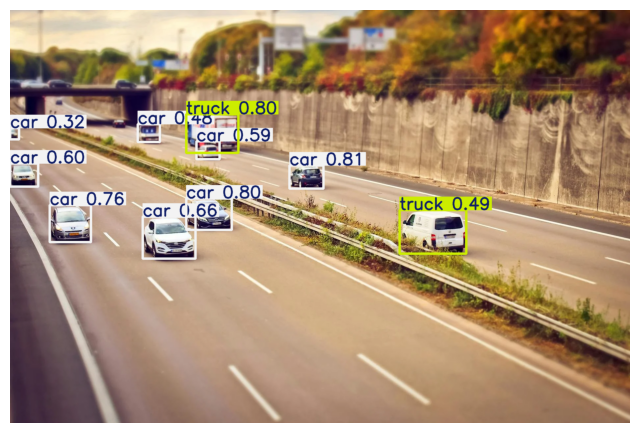

In [3]:
results = model("c:/Users/samik/Desktop/DL_prac7.webp")

import cv2
import matplotlib.pyplot as plt

# Loop through results
for result in results:
    annotated_frame = result.plot()  # this gives numpy array (BGR)
    
    # Convert BGR (OpenCV format) to RGB (matplotlib format)
    annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(8,6))
    plt.imshow(annotated_frame)
    plt.axis("off")
    plt.show()


In [ ]:
cap = cv2.VideoCapture(0)  # 0 = webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO detection
    results = model(frame)

    # Draw detections
    annotated_frame = results[0].plot()

    cv2.imshow("YOLO Detection", annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()